In [2]:
import json
import jiwer as ji
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Section1: Data Loading

This section is used for pre-processing the dataset.

### 1. DeepSpeech (with optimised alpha beta)

In [3]:
deepspeech_train = pd.DataFrame()
deepspeech_dev = pd.DataFrame()
deepspeech_test = pd.DataFrame()

In [6]:
with open('deepspeech_train.txt', 'r', encoding='utf-8') as file_read:
    data = file_read.read()
    loaded_json = json.loads(data)
    deepspeech_train = pd.DataFrame.from_dict(loaded_json)

with open('deepspeech_dev.txt', 'r', encoding='utf-8') as file_read:
    data = file_read.read()
    loaded_json = json.loads(data)
    deepspeech_dev = pd.DataFrame.from_dict(loaded_json)
    
with open('deepspeech_test.txt', 'r', encoding='utf-8') as file_read:
    data = file_read.read()
    loaded_json = json.loads(data)
    deepspeech_test = pd.DataFrame.from_dict(loaded_json)    

In [7]:
def replacePath(x):
    return x.split("/media/data/LTLab.lan/agarwal/german-speech-corpus/swiss_german/splits_mathias/clips/")[1]

deepspeech_train['wav_filename'] = deepspeech_train['wav_filename'].apply(replacePath)
deepspeech_dev['wav_filename'] = deepspeech_dev['wav_filename'].apply(replacePath)
deepspeech_test['wav_filename'] = deepspeech_test['wav_filename'].apply(replacePath)

In [8]:
deepspeech_train['length_ratio'] = deepspeech_train['res'].str.len()/deepspeech_train['src'].str.len()
deepspeech_dev['length_ratio'] = deepspeech_dev['res'].str.len()/deepspeech_dev['src'].str.len()
deepspeech_test['length_ratio'] = deepspeech_test['res'].str.len()/deepspeech_test['src'].str.len()

In [21]:
deepspeech_test[['wav_filename', 'src', 'res', 'wer', 'length_ratio']].head()

,wav_filename,src,res,wer,length_ratio
0,11300.wav,dies schafft auch kontinuität und sicherheit i...,der kultur lage von forenkultur fördergesetz a...,1.750000,1.655738
1,21061.wav,noch einmal zuhanden der finanzdirektorin,er weiterhin als ein zu handen fragen in,1.600000,0.975610
2,207.wav,aber etwas möchte ich trotzdem noch sagen,er wird mit den die gesagt etwas möchte es gle...,1.428571,1.219512
3,9522.wav,andernfalls schiesst das ganze thema der kompe...,es bildete reihenweise damit als man ein solch...,1.333333,1.522727
4,29842.wav,jetzt muss es wiederum auch in einen regionale...,dem muss ich wieder in ein regionalen windrich...,1.333333,1.524590


### 2. Jasper

In [13]:
jasper_train = pd.DataFrame()
jasper_dev = pd.DataFrame()
jasper_test = pd.DataFrame()

jasper = pd.DataFrame(columns = ['train', 'dev','test'])

In [14]:
data = []
with open('jasper_train.txt') as f:
    for row_num, line in enumerate(f):
        if line is not '\n':
            try:
                wav_filename = line.split('#')[0].rstrip('\t')
                res = line.split('#')[1].strip('\n').strip('\t').replace("\t", " ")
                match = deepspeech_train[deepspeech_train['wav_filename'].str.match(wav_filename+'.wav')]
                src = match['src'].iloc[0]
                wer = ji.wer(src, res)
                length_ratio = len(res)/len(src)
                data.append([wav_filename, res, src, wer, length_ratio])
            except:
                print(wav_filename)
jasper_train = pd.DataFrame(data = data, columns = ['wav_filename', 'res', 'src', 'wer', 'length_ratio'])

30492
30461


In [15]:
data = []
with open('jasper_dev.txt') as f:
    for row_num, line in enumerate(f):
        if line is not '\n':
            try:
                wav_filename = line.split('#')[0].rstrip('\t')
                res = line.split('#')[1].strip('\n').strip('\t').replace("\t", " ")
                match = deepspeech_dev[deepspeech_dev['wav_filename'].str.match(wav_filename+'.wav')]
                src = match['src'].iloc[0]
                wer = ji.wer(src, res)
                length_ratio = len(res)/len(src)
                data.append([wav_filename, res, src, wer, length_ratio])
            except:
                print(wav_filename)
jasper_dev = pd.DataFrame(data = data, columns = ['wav_filename', 'res', 'src', 'wer', 'length_ratio'])

25673
31921
6736
16961
23297
26886
32640
15283
15887
16978
22522
12508
6732
9743


In [16]:
data = []
with open('jasper_test.txt') as f:
    for row_num, line in enumerate(f):
        if line is not '\n':
            try:
                wav_filename = line.split('#')[0].rstrip('\t')
                res = line.split('#')[1].strip('\n').strip('\t').replace("\t", " ")
                match = deepspeech_test[deepspeech_test['wav_filename'].str.match(wav_filename+'.wav')]
                src = match['src'].iloc[0]
                wer = ji.wer(src, res)
                length_ratio = len(res)/len(src)
                data.append([wav_filename, res, src, wer, length_ratio])
            except:
                print(wav_filename)
jasper_test = pd.DataFrame(data = data, columns = ['wav_filename', 'res', 'src', 'wer', 'length_ratio'])

29472
3319
30907
381
1526
17699
23046
10994
29547
14885
22438
29979
13995
21704
19806
29470


In [18]:
jasper_test.head()

,wav_filename,res,src,wer,length_ratio
0,28865,das stimmt,das stimmt,0.00,1.000000
1,22091,die velowege,sichere velowege,0.50,0.750000
2,208,um ist das so,warum ist das so,0.25,0.812500
3,35393,die stehen bleiben,stehen bleiben,0.50,1.285714
4,31604,ein existiert,er existiert,0.50,1.083333


# Section 2: Analysis

This section is dedicated for data analysis.

### 1. Length Graph

**a. Train**

Blue: DeepSpeech
Orange: Jasper


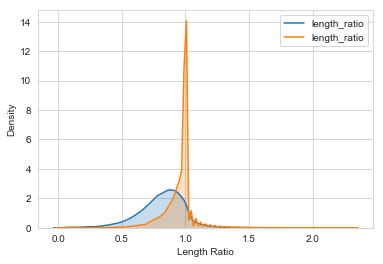

In [25]:
ax = sns.kdeplot(deepspeech_train['length_ratio'], shade=True)
sns.kdeplot(jasper_train['length_ratio'], shade=True)

sns.set_style("whitegrid")
ax.set(xlabel='Length Ratio', ylabel='Density')

print('Blue: DeepSpeech')
print('Orange: Jasper')

**b. Dev**

Blue: DeepSpeech
Orange: Jasper


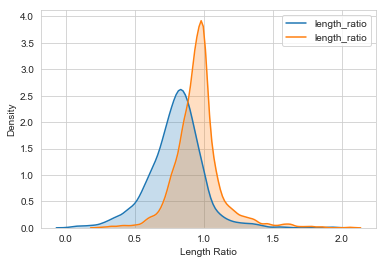

In [28]:
ax = sns.kdeplot(deepspeech_dev['length_ratio'], shade=True)
sns.kdeplot(jasper_dev['length_ratio'], shade=True)

sns.set_style("whitegrid")
ax.set(xlabel='Length Ratio', ylabel='Density')

print('Blue: DeepSpeech')
print('Orange: Jasper')

**c. Test**

Blue: DeepSpeech
Orange: Jasper


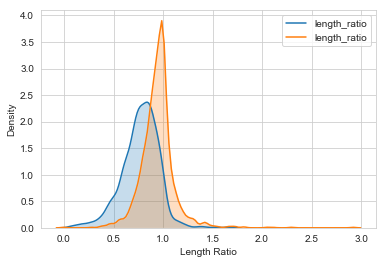

In [29]:
ax = sns.kdeplot(deepspeech_test['length_ratio'], shade=True)
sns.kdeplot(jasper_test['length_ratio'], shade=True)

sns.set_style("whitegrid")
ax.set(xlabel='Length Ratio', ylabel='Density')

print('Blue: DeepSpeech')
print('Orange: Jasper')

**WER Train**

In [76]:
deepspeech_train_no_issue = deepspeech_train[deepspeech_train['length_ratio'] > 0.75]
jasper_train_no_issue = jasper_train[jasper_train['length_ratio'] > 0.75]

In [77]:
#deepspeech
issue_dp = round(deepspeech_train['wer'].mean()*100,2)
no_issue_dp = round(deepspeech_train_no_issue['wer'].mean()*100,2)

#jasper
issue_jp = round(jasper_train['wer'].mean()*100,2)
no_issue_jp = round(jasper_train_no_issue['wer'].mean()*100,2)

In [78]:
data = [["Issue", issue_dp, issue_jp], ["No Issue", no_issue_dp, no_issue_jp]]
df = pd.DataFrame(data, columns=["Index", "Mozilla", "Jasper"])
df.set_index("Index")

,Mozilla,Jasper
Index,,
Issue,53.82,15.88
No Issue,46.26,13.27


**WER Dev**

In [79]:
deepspeech_dev_no_issue = deepspeech_dev[deepspeech_dev['length_ratio'] > 0.75]
jasper_dev_no_issue = jasper_dev[jasper_dev['length_ratio'] > 0.75]

In [80]:
#deepspeech
issue_dp = round(deepspeech_dev['wer'].mean()*100,2)
no_issue_dp = round(deepspeech_dev_no_issue['wer'].mean()*100,2)

#jasper
issue_jp = round(jasper_dev['wer'].mean()*100,2)
no_issue_jp = round(jasper_dev_no_issue['wer'].mean()*100,2)

In [81]:
data = [["Issue", issue_dp, issue_jp], ["No Issue", no_issue_dp, no_issue_jp]]
df = pd.DataFrame(data, columns=["Index", "Mozilla", "Jasper"])
df.set_index("Index")

,Mozilla,Jasper
Index,,
Issue,57.86,41.30
No Issue,51.00,39.66


**WER Test**

In [83]:
deepspeech_test_no_issue = deepspeech_test[deepspeech_test['length_ratio'] > 0.75]
jasper_test_no_issue = jasper_test[jasper_test['length_ratio'] > 0.75]

In [84]:
#deepspeech
issue_dp = round(deepspeech_test['wer'].mean()*100,2)
no_issue_dp = round(deepspeech_test_no_issue['wer'].mean()*100,2)

#jasper
issue_jp = round(jasper_test['wer'].mean()*100,2)
no_issue_jp = round(jasper_test_no_issue['wer'].mean()*100,2)

In [85]:
data = [["Issue", issue_dp, issue_jp], ["No Issue", no_issue_dp, no_issue_jp]]
df = pd.DataFrame(data, columns=["Index", "Mozilla", "Jasper"])
df.set_index("Index")

,Mozilla,Jasper
Index,,
Issue,59.68,43.97
No Issue,51.18,41.85
